<img src='https://gisgeography.com/wp-content/uploads/2014/07/What-Is-Geographic-Information-Systems-Featured-1265x727.jpg' width=800>

In [1]:
#pip install -U leafmap

In [2]:
#pip install rasterio

In [3]:
# pip install geopandas

In [4]:
import leafmap

In [5]:
map=leafmap.Map()
map.add_basemap('HYBRID')

map

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [6]:
map.to_html('mymap.html')

In [7]:
map.add_basemap('TERRAIN')

map

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…


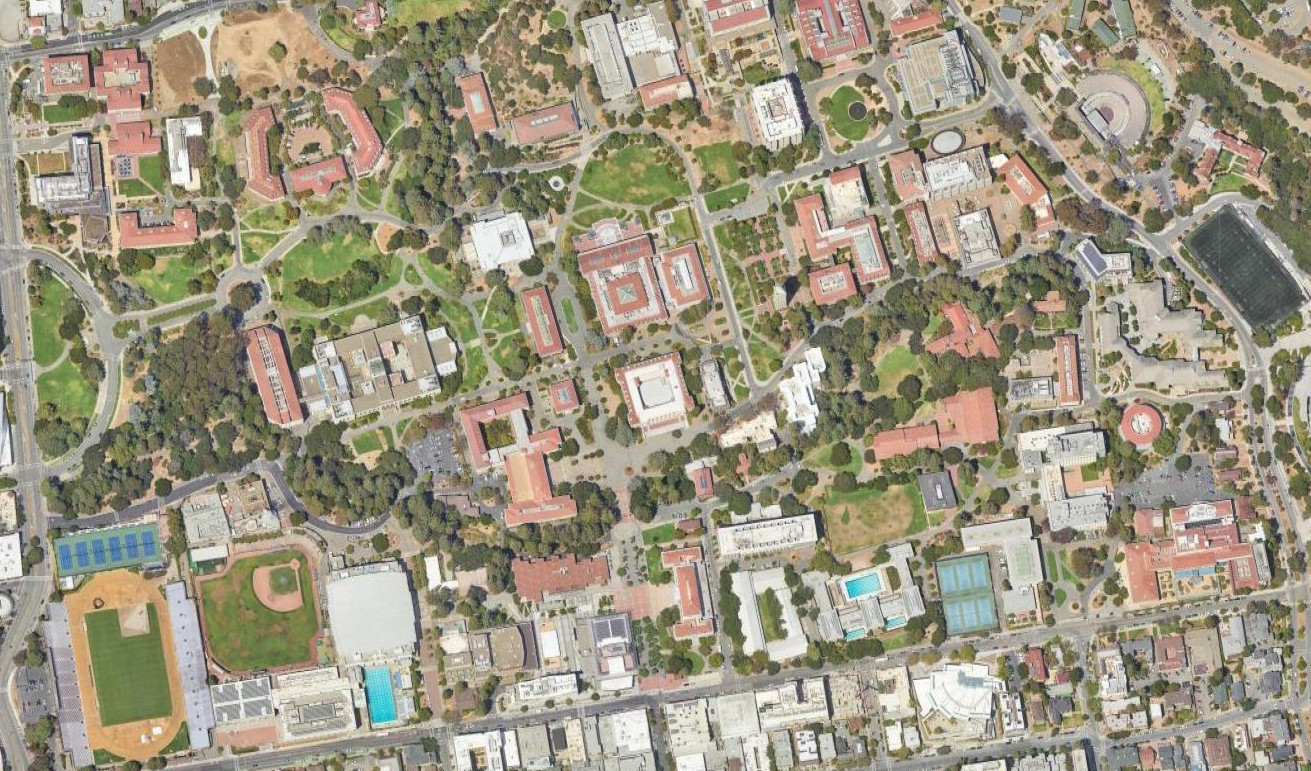
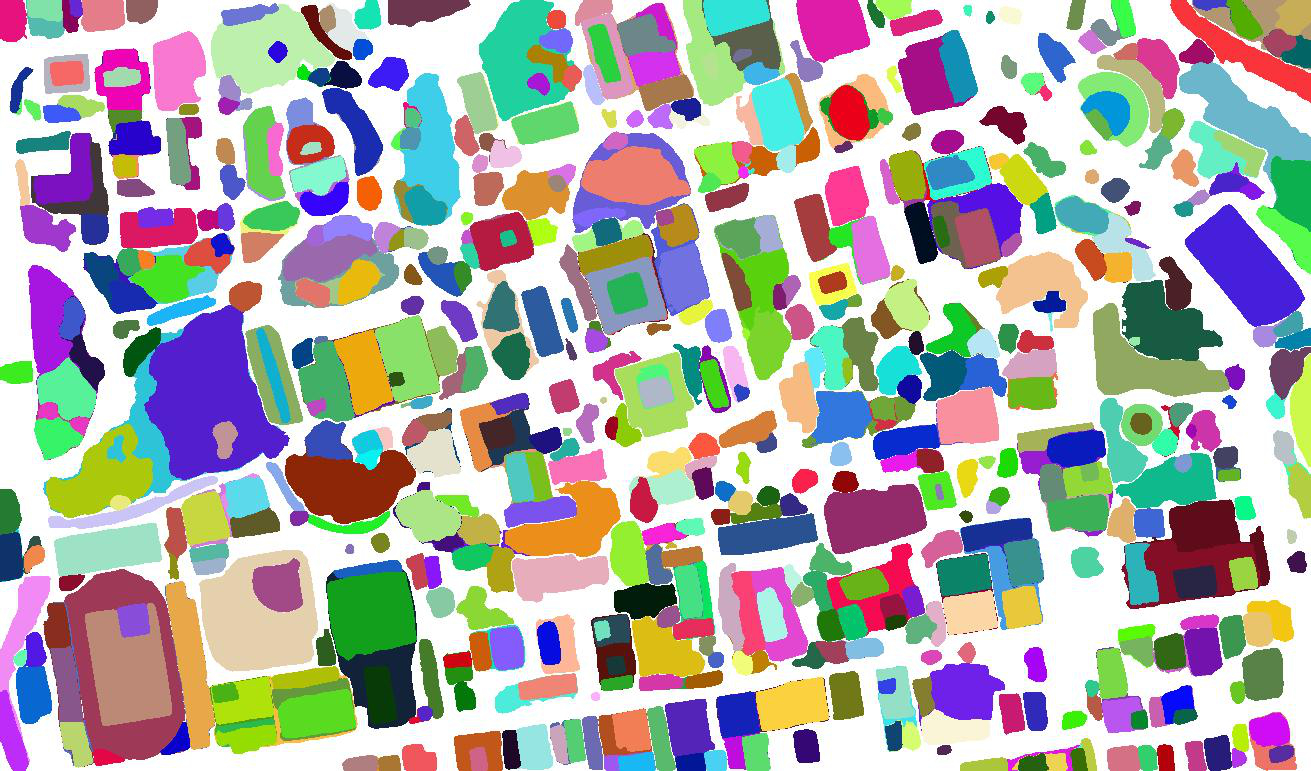

In [8]:
img1 = "https://open.gishub.org/data/images/berkeley.jpg"
img2 = "https://open.gishub.org/data/images/berkeley_sam.jpg"

leafmap.image_comparison(
    img1,
    img2,
    label1="Satellite Image",
    label2="Image Segmentation",
    starting_position=50,
    out_html="image_comparison.html",

)

In [9]:
import geopandas as gpd

In [10]:
gdf = gpd.read_file(
    "https://github.com/opengeos/leafmap/raw/master/examples/data/cable_geo.geojson"
)

In [11]:
m = leafmap.Map()
m.add_gdf(gdf, layer_name="Cable lines")

m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [12]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot,plot

init_notebook_mode(connected=True)

In [13]:
import pandas as pd

In [15]:
df=pd.read_csv('./Day 10 Students files/2014_World_Power_Consumption')

In [16]:
df.head()

Country  Power Consumption KWH                        Text
0          China           5.523000e+12     China 5,523,000,000,000
1  United States           3.832000e+12    United 3,832,000,000,000
2       European           2.771000e+12  European 2,771,000,000,000
3         Russia           1.065000e+12    Russia 1,065,000,000,000
4          Japan           9.210000e+11       Japan 921,000,000,000

In [17]:
data=dict(
    type="choropleth",
    colorscale='Viridis',
    reversescale=True,
    locations=df["Country"],
    locationmode="country names",
    z=df["Power Consumption KWH"],
    text=df["Country"],
    colorbar={'title':"World Power Consunmption"}
)

layout=dict(title="World Power Consunmption",
            geo=dict(showframe=False,projection={'type':'mercator'})
           )

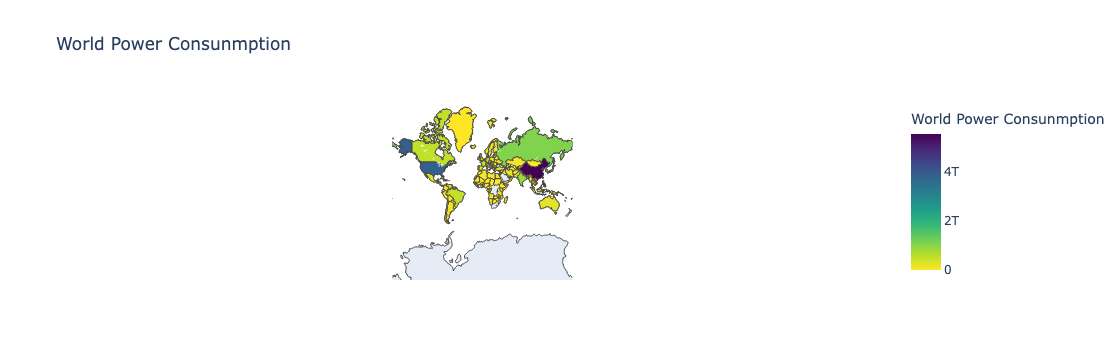

In [18]:
choromap=go.Figure(data=data,layout=layout)
iplot(choromap,validate=False)

In [42]:
df=pd.read_clipboard(header=None) # Copy manuel in chrome

In [43]:
df.head()

0          1
0           CHINA  4,102,286
1   UNITED STATES  3,413,684
2     PHILIPPINES  2,300,326
3          BRAZIL  1,560,049
4  UNITED KINGDOM  1,311,428

In [44]:
df.columns=['Country', 'Number of persons']
df.head()

Country Number of persons
0           CHINA         4,102,286
1   UNITED STATES         3,413,684
2     PHILIPPINES         2,300,326
3          BRAZIL         1,560,049
4  UNITED KINGDOM         1,311,428

In [45]:
df['Number of persons']=df['Number of persons'].str.replace(",", "")

In [46]:
data=dict(
    type="choropleth",
    colorscale='Viridis',
    reversescale=True,
    locations=df["Country"],
    locationmode="country names",
    z=df["Number of persons"],
    text=df["Country"],
    colorbar={'title':"Names of people who went to Mars"}
)

layout=dict(title="Names of people who went to Mars",
            geo=dict(showframe=False,projection={'type':'mercator'})
           )

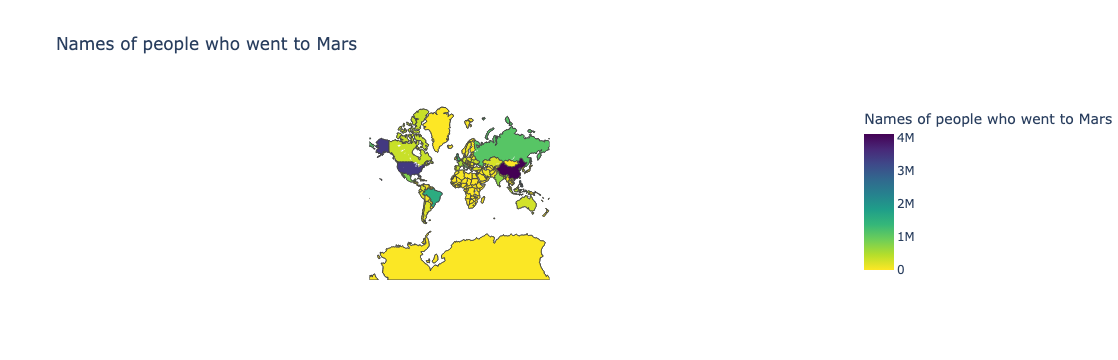

In [48]:
choromap=go.Figure(data=data,layout=layout)
iplot(choromap,validate=False)

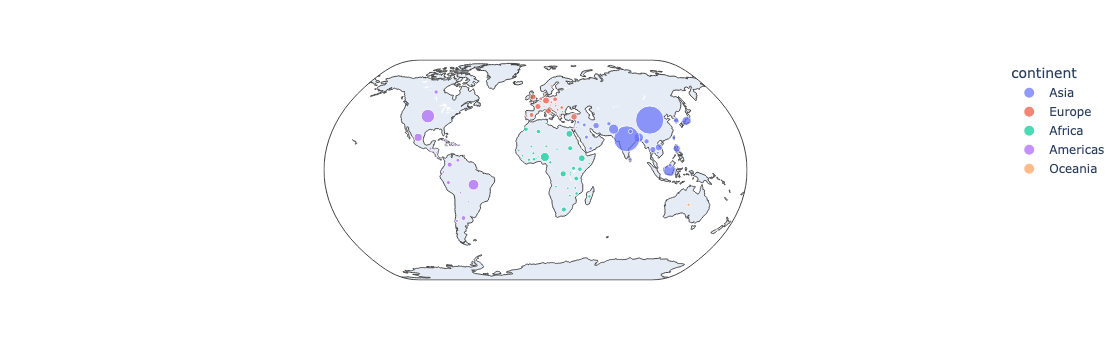

In [49]:
import plotly.express as px

df = px. data.gapminder().query("year==2007")
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     projection="natural earth"
                    )

fig.show()

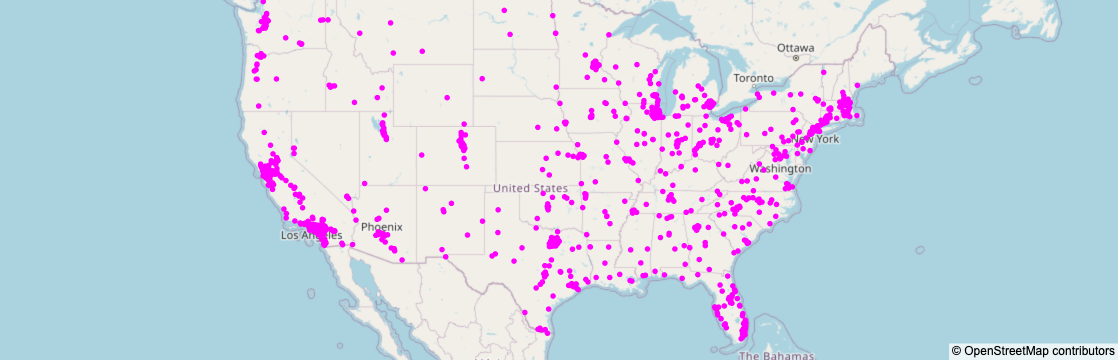

In [50]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

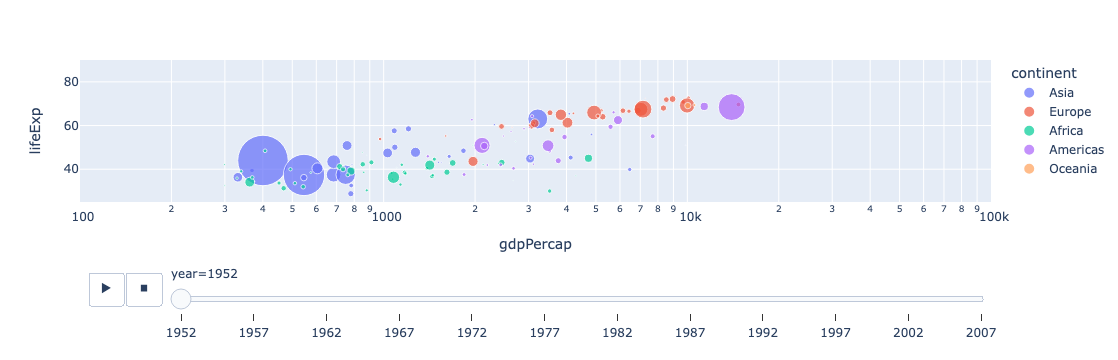

In [51]:
import plotly.express as px
df = px.data.gapminder()

px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])